In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl

In [34]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


精确度： 0.8275862068965517
['OSI5' 'OSI1' 'OSI8' 'ProfessionalRT' 'OSI4' 'MBIGS3' 'OSI2' 'PANAS2'
 'STPQjs2' 'STPQpe18' 'Post.1' 'OSI18' 'STPQai4' 'OSI17' 'STPQjs14'
 'STPQai17' 'PANAS19' 'LSS2' 'WORKTIME4' 'STPQpe6' 'STPQjs12' 'PANAS11'
 'OSI15' 'MBIGS6' 'MBIGS5' 'EPQas12' 'WFCS3' 'MBIGS2' 'PANAS20' 'PSQI3']


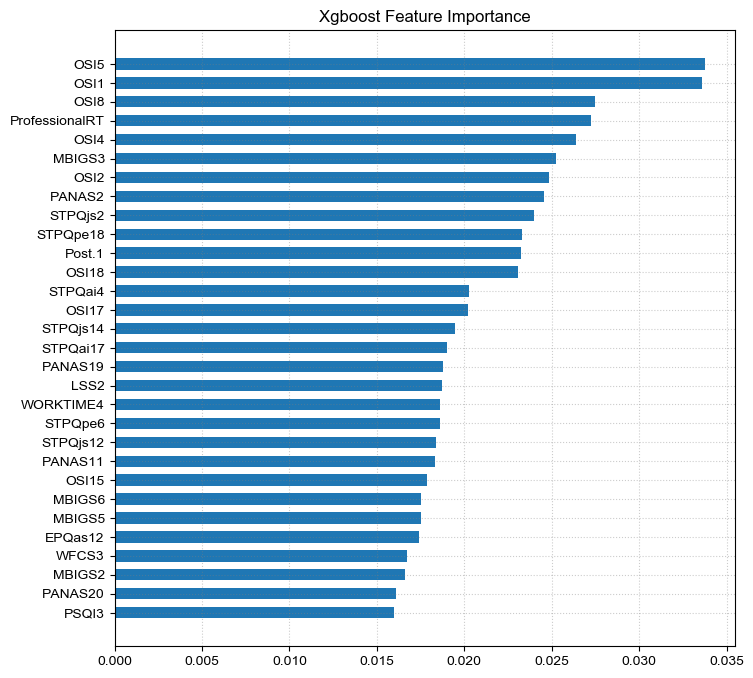

In [40]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/IterativeImputer-科技人员抑郁量表目标值分组.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/随机森林-科技人员抑郁量表目标值分组.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/IterativeImputer填空后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/IterativeImputer处理后数据.csv"
Dataset = pd.read_csv(fpath)
number = 30
x = Dataset.loc[:,  "STPQpost1":"Yincome.1"]
y2 = Dataset.loc[:, "health"]

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])

x_train, x_test, y_train, y_test = train_test_split(x, y2, test_size=0.33, random_state=7)
"""
max_depth:树的最大深度
"""
model = xgb.XGBRFClassifier(max_depth=10, learning_rate=0.16, n_estimators=1000, min_child_weight=4)

model.fit(x_train, y_train)
print("精确度：",model.score(x_test,y_test))
feature_important = model.feature_importances_
rank_idx  = np.argsort(feature_important)[::-1]
rank_idx15 = rank_idx[:number]

rank_names15 = names_dicts.loc[:, rank_idx15]
label = rank_names15.values[0, :]
print(label)
path1 = r"Xgboost排名前15的特征.csv"
pd.DataFrame(label).to_csv(path1, index=False)

x_score = np.sort(feature_important)[::-1]
path = r"Xgboost排名前15的得分.csv"
pd.DataFrame(x_score[:number]).to_csv(path, index=False)
# xgboost网格搜索调参
# gsCv = GridSearchCV(model,
#                 {'max_depth':list(range(3, 4, 1)),
#                  'learning_rate':[0.03, 0.06, 0.1, 0.15],
#                  'min_child_weight':list(range(2, 4, 2)),
#                  'n_estimators':list(range(10, 40, 10))})

# gsCv.fit(x_train, y_train)
# print(gsCv.best_params_)
# cv_results = pd.DataFrame(gsCv.cv_results_)
# path = r"paramRank.csv"
# cv_results.to_csv(path, index=False)

# 可视化
# plt.figure()
# plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
# plt.xlabel("Feature")
# plt.ylabel("Feature Score")
# plt.title("Feature Importance")
# plt.savefig("Xgboost")

# 可视化
plt.figure(figsize=(8, 8))
plt.barh(label[::-1], x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Xgboost Feature Importance")
# 添加数据标签
# for a, b in enumerate(rf_score[:30][::-1]):
#     plt.text(b+0.1, a-0.6/2, '%s' % b, ha='center', va='bottom')

plt.savefig("前15名特征")
plt.show()